<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymysql


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Disply all Columns
pd.options.display.max_columns=70

### Read the data

Read the data from MySQL that has the TV set as 1 for the price 199 and 0 for the price 299

In [3]:
# Connect to Mysql
db = pymysql.connect("localhost","root","<password>" ,database="ds")
cursor = db.cursor()

In [4]:
query = """
SELECT * from ds.promo_result_user;
"""
pricing=pd.read_sql_query(query,db) 

In [5]:
pricing1=pricing.copy()


In [6]:
pricing1=pricing.copy()
pricing1.info()
pricing1.drop('promo_date',axis=1,inplace=True)
pricing1.drop('promo_date_format',axis=1,inplace=True)
pricing1.drop('country',axis=1,inplace=True)
pricing1.drop('date_year',axis=1,inplace=True)
pricing1.drop('user_id',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233960 entries, 0 to 233959
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            233960 non-null  int64 
 1   promo_date         233960 non-null  object
 2   source             233960 non-null  object
 3   device             233960 non-null  object
 4   OS                 233960 non-null  object
 5   test               233960 non-null  int64 
 6   price              233960 non-null  int64 
 7   booked             233960 non-null  int64 
 8   promo_date_format  226363 non-null  object
 9   state              233960 non-null  object
 10  country            233960 non-null  object
 11  date_month         226363 non-null  object
 12  date_year          226363 non-null  object
 13  date_month_year    226363 non-null  object
 14  date_month_day     226363 non-null  object
 15  target_variable    233960 non-null  int64 
 16  earnings           2

In [7]:
pricing1.info()
pricing1.head()
pricing1.drop('date_month_year',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233960 entries, 0 to 233959
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   source           233960 non-null  object
 1   device           233960 non-null  object
 2   OS               233960 non-null  object
 3   test             233960 non-null  int64 
 4   price            233960 non-null  int64 
 5   booked           233960 non-null  int64 
 6   state            233960 non-null  object
 7   date_month       226363 non-null  object
 8   date_month_year  226363 non-null  object
 9   date_month_day   226363 non-null  object
 10  target_variable  233960 non-null  int64 
 11  earnings         233960 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.4+ MB


In [8]:
pricing1.isna().sum

<bound method DataFrame.sum of         source  device     OS   test  price  booked  state  date_month  \
0        False   False  False  False  False   False  False       False   
1        False   False  False  False  False   False  False       False   
2        False   False  False  False  False   False  False       False   
3        False   False  False  False  False   False  False       False   
4        False   False  False  False  False   False  False       False   
...        ...     ...    ...    ...    ...     ...    ...         ...   
233955   False   False  False  False  False   False  False       False   
233956   False   False  False  False  False   False  False       False   
233957   False   False  False  False  False   False  False       False   
233958   False   False  False  False  False   False  False       False   
233959   False   False  False  False  False   False  False       False   

        date_month_day  target_variable  earnings  
0                False      

In [9]:
pricing1.price.value_counts()

199    149647
299     84313
Name: price, dtype: int64

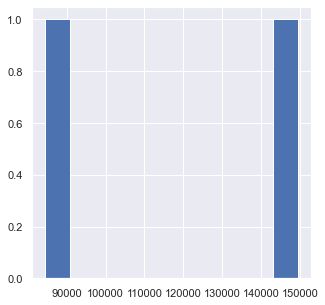

In [10]:
plt.rcParams['figure.figsize'] = 5,5  # control plot sizeimport seaborn as sns
pricing1.target_variable.value_counts().hist()

In [11]:
#pricing_booked = pricing[pricing['booked'] == 1]
#pricing_booked

In [12]:
pricing1.skew()

test               0.582402
price              0.581649
booked             7.199756
target_variable   -0.581649
earnings           7.677461
dtype: float64

In [13]:
to_dummy = pricing1.select_dtypes(exclude=[np.number]).columns
pricing_dummies  = pd.get_dummies(pricing1, prefix = to_dummy, columns = to_dummy, drop_first = True)
pricing_dummies.head()

,test,price,booked,target_variable,earnings,source_Bing,source_Facebook,source_Google,source_Other,source_Unknown,device_mobile,OS_iOS,OS_linux,OS_mac,OS_other,OS_windows,state_NY,state_PA,date_month_July,date_month_June,date_month_March,date_month_May,date_month_day_Mon,date_month_day_Sat,date_month_day_Sun,date_month_day_Thu,date_month_day_Tue,date_month_day_Wed
0,0,199,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0,199,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,0,199,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,0,199,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,1,299,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [14]:
pricing1.head()

,source,device,OS,test,price,booked,state,date_month,date_month_day,target_variable,earnings
0,Facebook,desktop,windows,0,199,0,PA,April,Sun,1,0
1,Unknown,desktop,mac,0,199,0,PA,June,Thu,1,0
2,Facebook,mobile,iOS,0,199,0,PA,May,Wed,1,0
3,Google,desktop,windows,0,199,0,PA,June,Tue,1,0
4,Unknown,mobile,android,1,299,0,NJ,June,Wed,0,0


In [15]:
pricing_dummies.head()

,test,price,booked,target_variable,earnings,source_Bing,source_Facebook,source_Google,source_Other,source_Unknown,device_mobile,OS_iOS,OS_linux,OS_mac,OS_other,OS_windows,state_NY,state_PA,date_month_July,date_month_June,date_month_March,date_month_May,date_month_day_Mon,date_month_day_Sat,date_month_day_Sun,date_month_day_Thu,date_month_day_Tue,date_month_day_Wed
0,0,199,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0,199,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,0,199,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,0,199,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,1,299,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


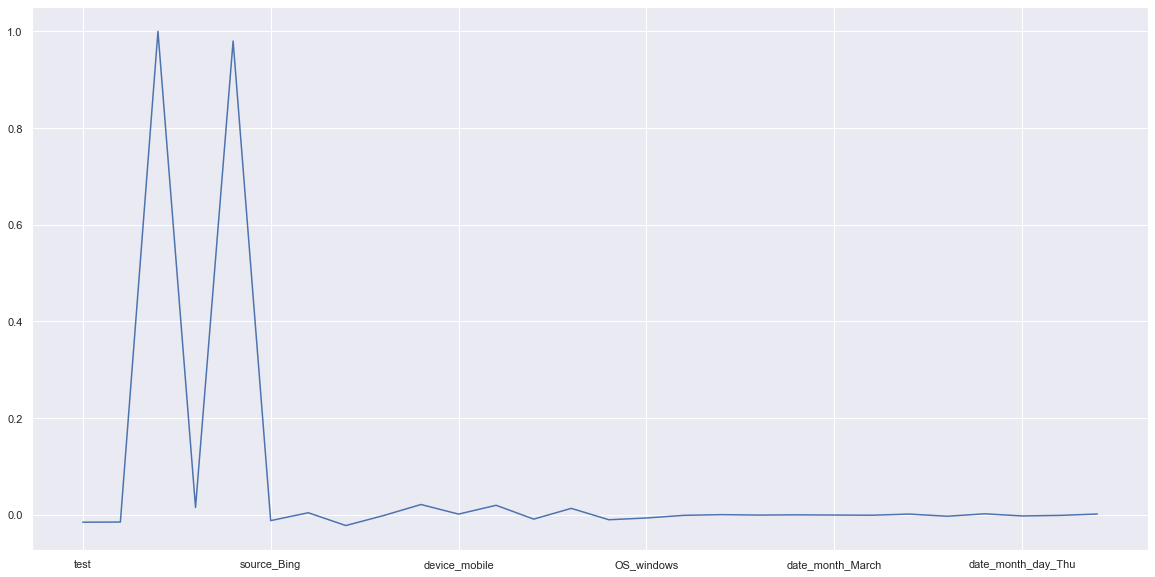

In [16]:
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
pricing_dummies.corr()['booked'].plot()

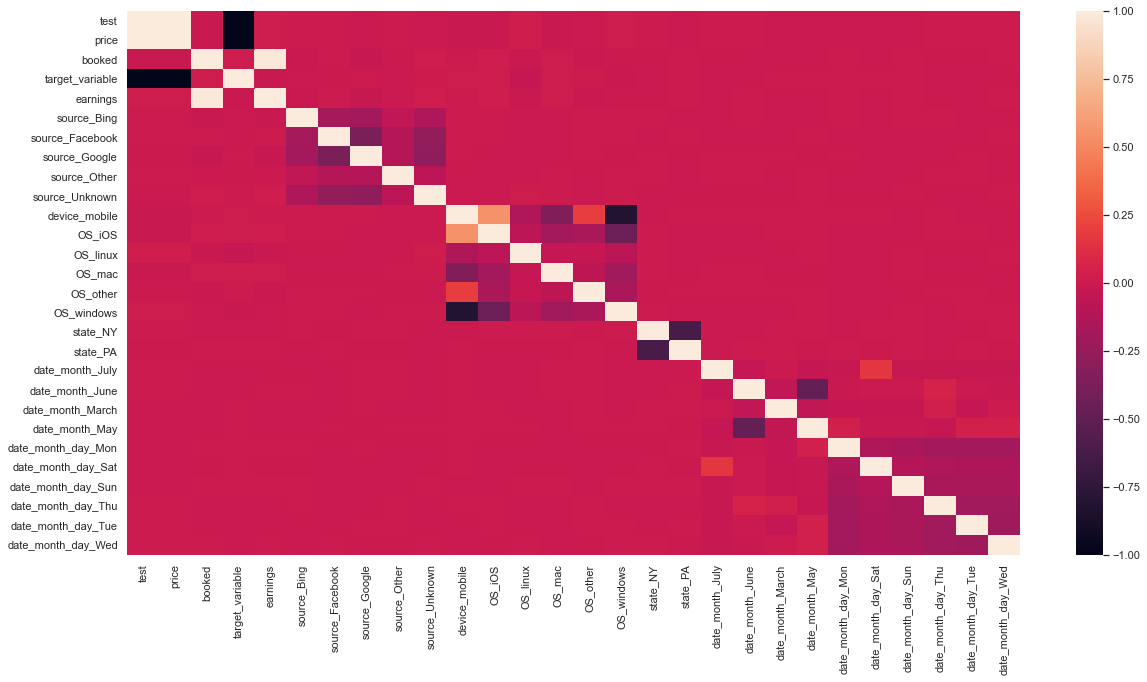

In [17]:
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(pricing_dummies.corr())

In [18]:
corr_matrix = pricing_dummies.corr()
c = corr_matrix.abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation
sol

test             price                 0.997432
booked           earnings              0.980073
device_mobile    OS_iOS                0.547831
                 OS_other              0.190435
date_month_July  date_month_day_Sat    0.160494
                                         ...   
date_month_June  date_month_May       -0.477977
state_NY         state_PA             -0.623675
device_mobile    OS_windows           -0.817932
test             target_variable      -0.997432
price            target_variable      -1.000000
Length: 378, dtype: float64

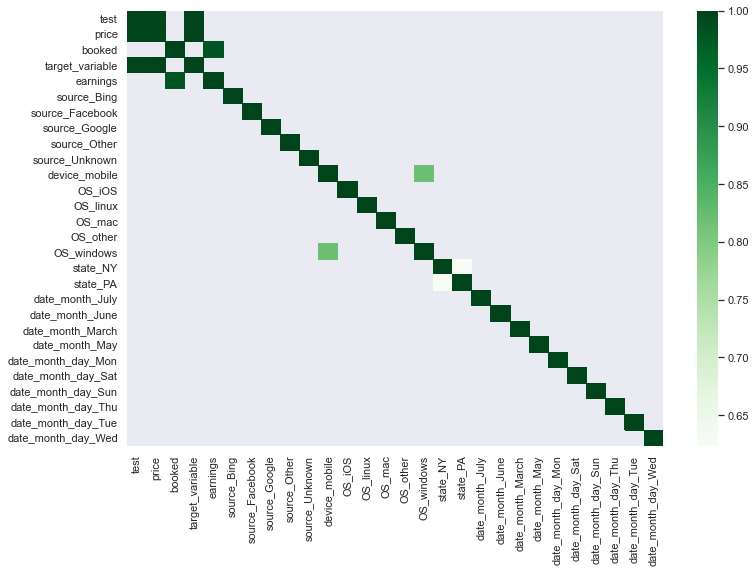

In [19]:
corr = corr_matrix.abs()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [20]:
# Create correlation matrix
corr_matrix = pricing_dummies.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop

['price', 'target_variable', 'earnings', 'OS_windows', 'state_PA']

In [21]:
# Disply all Columns


#clean_Office_Supply.corr().unstack().sort_values().drop_duplicates()
pricing_dummies[pricing_dummies.columns[0:]].corr()['booked'][:].sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
#sales_corr.sort_values(kind="quicksort")

booked                1.000000
earnings              0.980073
source_Unknown        0.021171
OS_iOS                0.019559
target_variable       0.015106
OS_mac                0.013171
source_Facebook       0.004132
date_month_day_Sun    0.001934
date_month_day_Wed    0.001513
date_month_day_Mon    0.001372
device_mobile         0.001327
state_PA              0.000201
date_month_June      -0.000221
date_month_March     -0.000634
date_month_July      -0.000706
date_month_May       -0.000967
state_NY             -0.001250
date_month_day_Tue   -0.001347
source_Other         -0.001774
date_month_day_Thu   -0.002487
date_month_day_Sat   -0.003118
OS_windows           -0.006708
OS_linux             -0.009056
OS_other             -0.010358
source_Bing          -0.012155
price                -0.015106
test                 -0.015393
source_Google        -0.022347
Name: booked, dtype: float64

In [22]:
COLS_TO_KEEP = [    
'booked'
,'device_mobile'         
,'OS_iOS'              
,'OS_mac'              
,'source_Google'       
,'OS_other'             
,'date_month_day_Mon'   
,'state_PA'             
,'date_month_May'      
,'date_month_March'  
,'date_month_day_Sat'  
,'source_Unknown'       
,'date_month_day_Sun'  
,'source_Other'        
,'date_month_day_Wed'   
,'date_month_day_Thu'   
,'date_month_July'      
,'source_Bing'         
,'date_month_June'    
,'state_NY'             
,'date_month_day_Tue'   
,'source_Facebook'     
#,'earnings'            
,'OS_windows'         
,'OS_linux'            
,'test'                
,'price']


In [24]:
pricing_dummies = pricing_dummies[COLS_TO_KEEP].copy()

In [25]:
pricing_dummies.head()

,booked,device_mobile,OS_iOS,OS_mac,source_Google,OS_other,date_month_day_Mon,state_PA,date_month_May,date_month_March,date_month_day_Sat,source_Unknown,date_month_day_Sun,source_Other,date_month_day_Wed,date_month_day_Thu,date_month_July,source_Bing,date_month_June,state_NY,date_month_day_Tue,source_Facebook,OS_windows,OS_linux,test,price
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,199
1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,199
2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,199
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,199
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,299


In [27]:
# Using all data for clustering
X = pricing_dummies

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
#Clustering prediction Elbow method
from sklearn.cluster import KMeans #, AgglomerativeClustering
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
 "random_state": 42,
 }

In [29]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

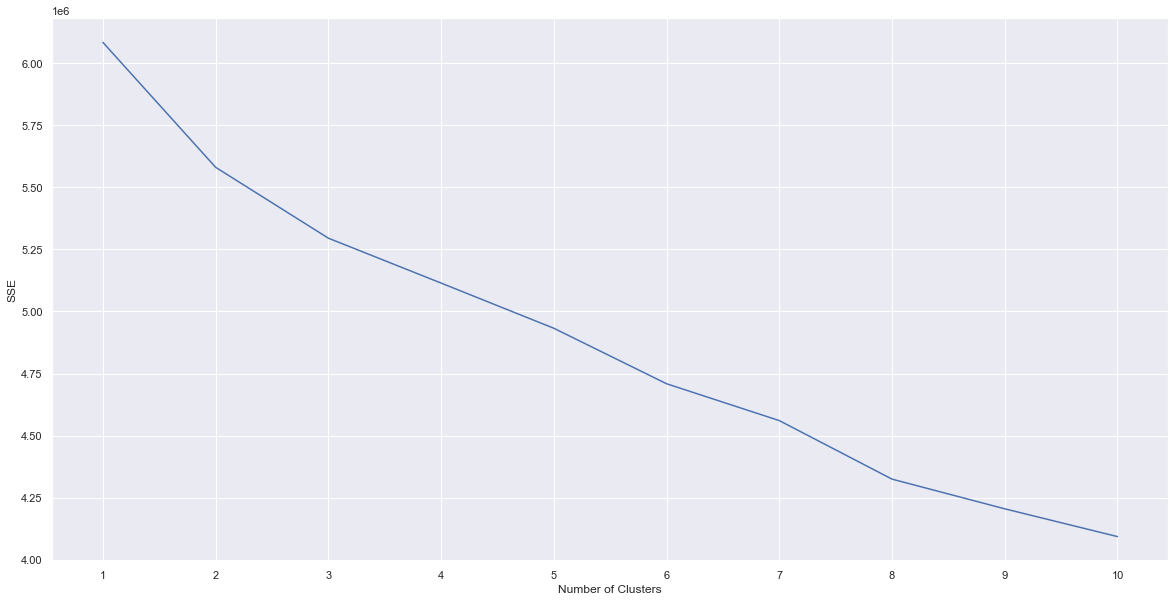

In [30]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

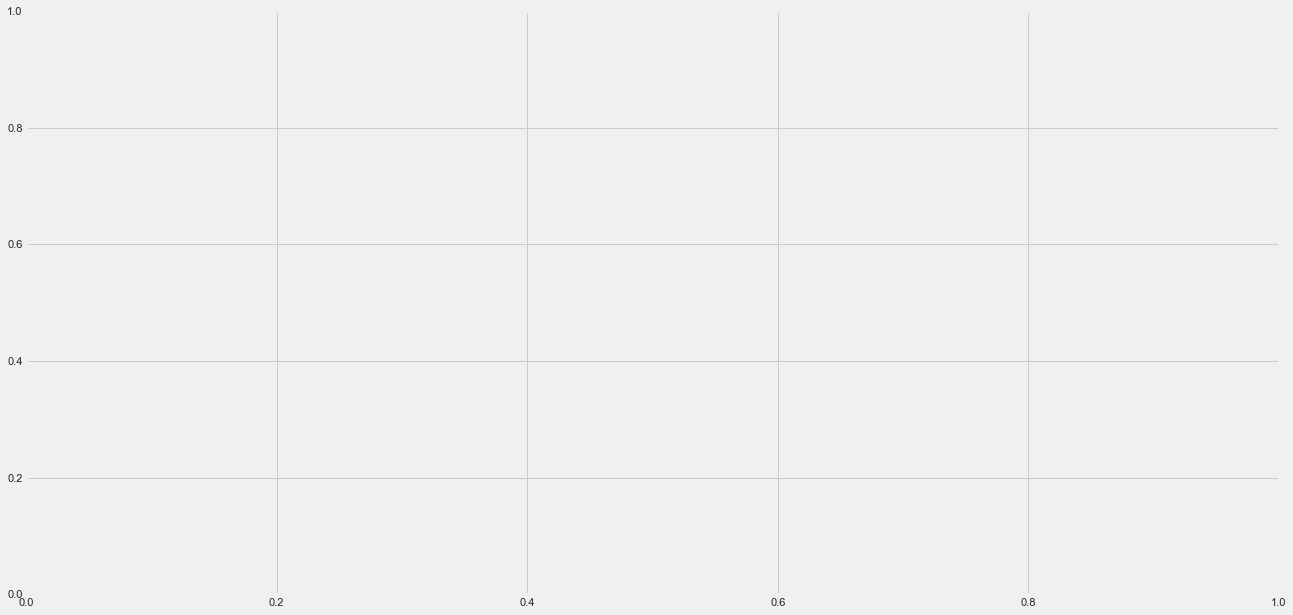

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [36]:
#The knee (or elbow) point is calculated simply by instantiating the KneeLocator class with x, y and the appropriate curve and direction.

from kneed import DataGenerator, KneeLocator

kneedle = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing"
)

kneedle.elbow


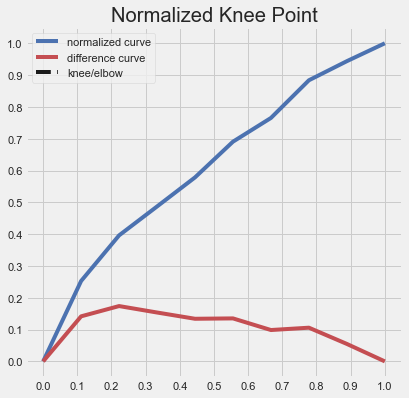

In [34]:
#The KneeLocator class also has two plotting functions for quick visualizations. Note that all (x, y) are transformed for the normalized plots
kneedle.plot_knee_normalized()

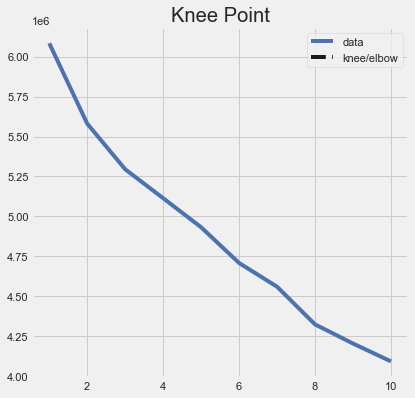

In [35]:
# Raw data and knee.
kneedle.plot_knee()

In [37]:
from sklearn.cluster import KMeans #, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV

In [38]:
# Create the model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 45)

In [39]:
# Fitting K-Means to the dataset
cluster_pipe = kmeans.fit_predict(X)

In [40]:
kmeans.labels_

array([3, 5, 1, ..., 1, 2, 1])

In [43]:
# Adding Cluster columns to Dataset 
pricing1['clusters'] = kmeans.labels_

In [44]:
pricing1.to_csv('Pricing_Clusters.csv')